In [1]:
%load_ext autoreload
%autoreload 2

#cv2
%pip install opencv-python 
# astroNN
%pip install git+https://github.com/henrysky/astroNN.git 

from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from pathlib import Path
import os
import h5py
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.insert(0, "..")
sys.path

from src.data import data_pre

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hjtfs\AppData\Local\pypoetry\Cache\virtualenvs\hu-deeplearning-lSm0EZYV-py3.8\Scripts\python.exe -m pip install --upgrade pip' command.
  Running command git clone --filter=blob:none -q https://github.com/henrysky/astroNN.git 'C:\Users\hjtfs\AppData\Local\Temp\pip-req-build-4ryb6bqf'
You should consider upgrading via the 'C:\Users\hjtfs\AppData\Local\pypoetry\Cache\virtualenvs\hu-deeplearning-lSm0EZYV-py3.8\Scripts\python.exe -m pip install --upgrade pip' command.


  Cloning https://github.com/henrysky/astroNN.git to c:\users\hjtfs\appdata\local\temp\pip-req-build-4ryb6bqf
  Resolved https://github.com/henrysky/astroNN.git to commit 6a7d2eb1aefad0a72e88788111865b018d86b11f
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [2]:
datadir_raw = Path("../data/raw")
datadir_processed = Path("../data/processed")

In [3]:
data_pre.get_raw_data(datadir_raw) # takes a few minutes 2.6 GB

2022-02-07 10:06:43.822 | INFO     | src.data.data_pre:get_raw_data:26 - found Galaxy10_decals.h5 in ..\data\raw, not downloading again


In [4]:
hf = h5py.File(datadir_raw /"Galaxy10_decals.h5", 'r')
key_list = list(hf.keys())
print ("keys in file: " + ', '.join(key_list))

keys in file: ans, dec, images, pxscale, ra, redshift


In [5]:
images = np.array(hf['images'])
labels = np.array(hf['ans'])

counts = np.unique(labels, return_counts=True)

print("number per label:")
print (counts)

number per label:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1081, 1853, 2645, 2027,  334, 2043, 1829, 2628, 1423, 1873],
      dtype=int64))


In [6]:
unique_labels = list(set(labels))

galaxy_types = []
for j in unique_labels:
    names = galaxy10cls_lookup(j)
    galaxy_types.append(names)

print(galaxy_types)

['Disturbed', 'Merging', 'Round Smooth', 'Smooth, Cigar shaped', 'Cigar Shaped Smooth', 'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on without Bulge', 'Edge-on with Bulge']


In [7]:
data_pre.sub_folders(datadir_processed, datadir_raw, galaxy_types) 

2022-02-07 10:07:20.074 | INFO     | src.data.data_pre:sub_folders:54 - Main folder ..\data\processed allready exists
2022-02-07 10:07:20.075 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\Disturbed allready exists
2022-02-07 10:07:20.075 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\Merging allready exists
2022-02-07 10:07:20.075 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\Round Smooth allready exists
2022-02-07 10:07:20.076 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\Smooth, Cigar shaped allready exists
2022-02-07 10:07:20.076 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\Cigar Shaped Smooth allready exists
2022-02-07 10:07:20.077 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\Barred Spiral allready exists
2022-02-07 10:07:20.077 | INFO     | src.data.data_pre:sub_folders:62 - Subfolder ..\data\processed\

In [8]:
printcount = 'y'
data_pre.count_images(datadir_processed, printcount, galaxy_types)

Disturbed 1081
Merging 1853
Round Smooth 2645
Smooth, Cigar shaped 2027
Cigar Shaped Smooth 334
Barred Spiral 2043
Unbarred Tight Spiral 1829
Unbarred Loose Spiral 2628
Edge-on without Bulge 1423
Edge-on with Bulge 1873
Total number of images: 17736


In [9]:
data_pre.process_data(datadir_processed, datadir_raw, galaxy_types, images, labels)

2022-02-07 10:07:20.874 | INFO     | src.data.data_pre:process_data:125 - Data allready exists


In [10]:
print(data_pre.get_size(datadir_processed), 'MB')

50.600152 MB


Found 17736 files belonging to 10 classes.


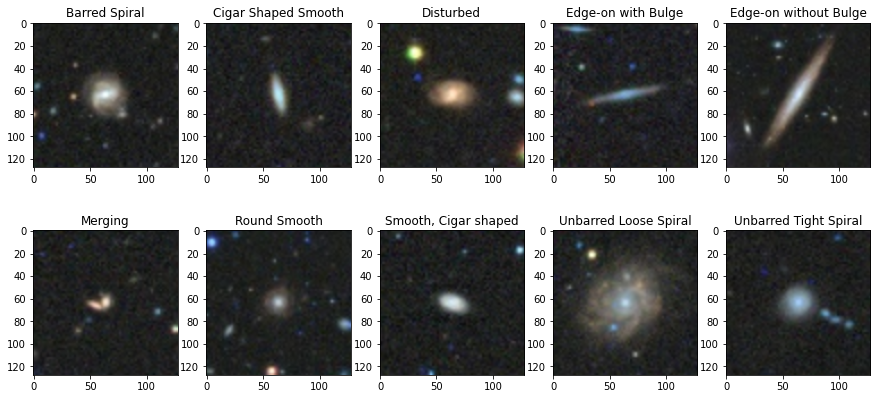

In [11]:
whole = tf.keras.utils.image_dataset_from_directory(
    datadir_processed, labels='inferred', label_mode='int', image_size=(128,
    128))

class_names = whole.class_names
plt.figure(figsize=(15, 7))
for i in range(len(class_names)):
    filtered_whole = whole.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_whole.take(1):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('on')